## Investment Distribution

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
top_stocks = pd.read_csv('../data/top_stocks.csv')
top_stocks

,Ticker Symbol,Stock Price,Profit Margin,Working Capital Ratio,Quick Ratio,Earning Per Share,P/E Ratio,D/E Ratio,Ranking
0,YHOO,33.37,88.0,5.88,588.0,-4.64,-7.19,0.56,71.48
1,APA,44.81,369.0,2.04,173.0,-61.20,-0.73,6.34,61.78
2,FTR,4.66,4.0,5.35,535.0,-0.29,-16.07,3.82,55.07
3,XEC,89.51,166.0,2.63,250.0,-25.92,-3.45,0.87,45.02
4,AKAM,52.90,15.0,3.77,377.0,1.80,29.39,0.34,40.57


## Stock Distribution
- Stock YHOO = 5% 
- Stock APA = 30 % 
- Stock FTR =  15 %
- Stock XEC = 25%
- Stock AKAM = 25%
- Pie chart = 100% 


In [10]:
ranking = len(top_stocks['Ranking'])

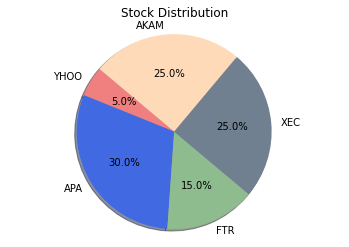

In [26]:
top_stocks = plt.pie(
    x=[5,30,15,25,25], 
    labels=["YHOO", "APA","FTR","XEC","AKAM"],  
    explode=[0,0,0,0,0], 
    colors=["lightcoral", "royalblue", "darkseagreen","slategray","peachpuff"],
    autopct="%1.1f%%",                                       
    shadow=True, 
    startangle=140
)
plt.title('Stock Distribution')

plt.axis("equal")

plt.show()

In [34]:
budget = input("How muh money do you want to invest today?")

How muh money do you want to invest today? 1000


In [35]:
print(f'You should invest ${int(budget)*0.3} in the APA stock')
print(f'You should invest ${int(budget)*0.25} in the XEC stock')
print(f'You should invest ${int(budget)*0.25} in the AKAM stock')
print(f'You should invest ${int(budget)*0.05} in the YHOO stock')
print(f'You should invest ${int(budget)*0.15} in the FTR stock')

You should invest $300.0 in the APA stock
You should invest $250.0 in the XEC stock
You should invest $250.0 in the AKAM stock
You should invest $50.0 in the YHOO stock
You should invest $150.0 in the FTR stock
